# This template will calculate the quantum yield and steady state concentrations of singlet oxygen and the triplet state of sensitizer from a reference sensitizer of PN (simultaneous quantification)

# Things to note before using this template
- You will need to upload UV-Vis absorbance data and manually input HPLC integration data (in the 6th executable cell with code) 
- Make sure you upload the csv data files from UV-Vis, they should work in the format that the UV-Vis software provides them, otherwise convert it to UTF-8 encoded csv files (but only if you need to, its easier to just upload the files directly from UV-Vis)
- Everywhere there is _____ , change a name to match the name of your file
- When you are pulling out the absorbance data, change the sequential order of the "unnamed" variables to match the order you took measurements 
- This template code assumes you ran triplicates for your sample, if your experiment differs from this set up you will need to modify the variables/calculations accordingly

- Any questions/comments/suggestions can be sent to Keighan Gemmell (keighan@chem.ubc.ca) 
- Last updated on Oct 6th, 2023

# Import Packages

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import math

# Read in the UV-Vis data as a CSV File

In [ ]:
#First you will need to upload your csv file to this server
#then read in csv file as pandas dataframe, skipping the 2nd row
df = pd.read_csv('___.csv' )#,skiprows=[0]) #change the name of the csv file to the name of the file you imported

#this will output the table again from pandas (pd). make sure you are pulling out the correct data in the next block of code
#df


In [ ]:
wavelength=np.linspace(800,200,601) #make wavelength array

#Note: It's weird, but when reading in the csv file to python, it sometimes auto-names the samples to "unnamed: #" 
#extract absorbances (remember that because of the layout of the csv file the absorbances will sometimes be 
#named "Unnamed: x (odd number). Just check that you are indexing the correct names when assigning variables
sample1_abs = df['Unnamed: x'] 
sample2_abs = df['Unnamed: x']
sample3_abs = df['Unnamed: x']
blank_abs = df['Unnamed: x']
PN_abs = df['Unnamed: x']

#change all absorbances to type 'float' for ease of calculation
sample1_abs=sample1_abs.astype(float)
sample2_abs=sample2_abs.astype(float)
sample3_abs=sample3_abs.astype(float)
blank_abs=blank_abs.astype(float)
PN_abs=PN_abs.astype(float)


# Read in the Irradiance Data from Actinometry 

In [ ]:
#This is set up for the file I used at the time, modify it for your actinometry file
dfIrr = pd.read_csv('1O2 Quantum Yield Template.csv', skiprows=[1])
Irr=dfIrr['Unnamed: 4']
n=3
Irr=Irr[n:604]
Irr=Irr.astype(float)

# Convert Irradiance to proper units for photochemical calculations 

In [ ]:
#Convert data to mmol photon units
c=3*10**8 #m/s, speed of light
h=6.626*10**-34 #J s, Planck constant
Na=6.023*10**23 #mol^-1 , Avagadro number

Irr_mmol=(Irr*wavelength*10**-10)/(h*c*Na) #Convert sunlight irradiance to mmol units

# Do the Absorbance Correction Here

In [ ]:
#Do the absorbance corrections
#correct for the baseline
PN_abs=PN_abs-blank_abs
sample1_abs=sample1_abs-blank_abs
sample2_abs=sample2_abs-blank_abs
sample3_abs=sample3_abs-blank_abs

#Find where Irradiation starts to be more than noise 
index_irr=np.argmax(Irr>100) #here I choose 100 as the threshold value for irradiation to be non-negligable 

#Subset 800nm to this wavelength in the absorbance to average for correction
#I start from 0 because in the wavelength array 800nm is in the 0th position
sample1_abs_subset=sample1_abs[0:index_irr]
sample2_abs_subset=sample2_abs[0:index_irr]
sample3_abs_subset=sample3_abs[0:index_irr]
PN_abs_subset=PN_abs[0:index_irr]

#Take the mean
sample1_mean_correction=np.mean(sample1_abs_subset)
sample2_mean_correction=np.mean(sample2_abs_subset)
sample3_mean_correction=np.mean(sample3_abs_subset)
PN_mean_correction=np.mean(PN_abs_subset)

#Subtract to apply the correction
sample1_abs=sample1_abs-sample1_mean_correction
sample2_abs=sample2_abs-sample2_mean_correction
sample3_abs=sample3_abs-sample3_mean_correction
PN_abs=PN_abs-PN_mean_correction


# Put in your HPLC data here, will need to change times based on your sampling times 

In [ ]:
#Change times to match your times of sampling
PNtime=np.array([0, 1, 2, 4, 8])*60 #put in times and convert to seconds
times=np.array([0, 2, 4, 8, 16, 24, 32, 48])*60

#---------------- FFA
PNFFA=[]

SENSITIZERFFA1=[]
SENSITIZERFFA2=[]
SENSITIZERFFA3=[]

#---------------- SYRINGOL 
PNSYR=[]

SENSITIZERSYR1=[]
SENSITIZERSYR2=[]
SENSITIZERSYR3=[]

#---------------- Controls
blankFFA=[]
blankSYR=[]

darkFFA=[]
darkSYR=[]


# Calculate ln(FFAt/FFA0) here

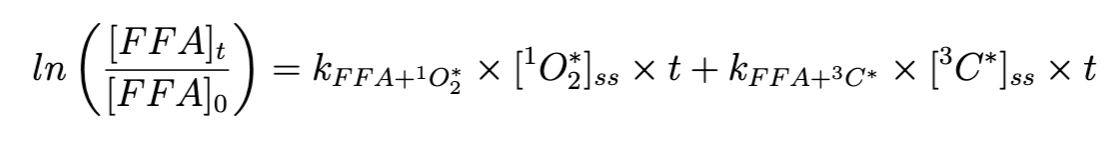

In [ ]:
#Don't worry, np.log is the natural logorithm, not base 10 (np.log10 is base 10)
sample1logFFA=np.log([i/SENSITIZERFFA1[0] for i in SENSITIZERFFA1])
sample2logFFA=np.log([i/SENSITIZERFFA2[0] for i in SENSITIZERFFA2])
sample3logFFA=np.log([i/SENSITIZERFFA3[0] for i in SENSITIZERFFA3])
PNlogFFA=np.log([i/PNFFA[0] for i in PNFFA])


# Obtain the slope using a 1st degree polynomial fit function 

In [ ]:
#Obtain slope for all lines for quantum yield calculation, then take the negative to get kobs
#the [0] indicates I am pulling out the slope, i.e "m" in y=mx+b
kobs1FFA=-(np.polyfit(times,sample1logFFA,1)[0])
kobs2FFA=-(np.polyfit(times,sample2logFFA,1)[0])
kobs3FFA=-(np.polyfit(times,sample3logFFA,1)[0])

kobsPNFFA=-(np.polyfit(PNtime,PNaug2FFAlog,1)[0])


# Calculate ln(SYRt/SYR0) here

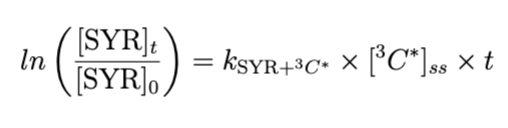

In [ ]:
#Don't worry, np.log is the natural logorithm, not base 10 (np.log10 is base 10)
sample1logSYR=np.log([i/SENSITIZERSYR1[0] for i in SENSITIZERSYR1])
sample2logSYR=np.log([i/SENSITIZERSYR2[0] for i in SENSITIZERSYR2])
sample3logSYR=np.log([i/SENSITIZERSYR3[0] for i in SENSITIZERSYR3])
PNlogSYR=np.log([i/PNSYR[0] for i in PNSYR])


In [ ]:
#Obtain slope for all lines for quantum yield calculation, then take the negative to get kobs
#the [0] indicates I am pulling out the slope, i.e "m" in y=mx+b
kobs1SYR=-(np.polyfit(times,sample1logSYR,1)[0])
kobs2SYR=-(np.polyfit(times,sample2logSYR,1)[0])
kobs3SYR=-(np.polyfit(times,sample3logSYR,1)[0])

kobsPNSYR=-(np.polyfit(PNtime,PNaug2SYRlog,1)[0])


# Equations for Samples

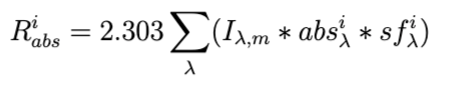

In [ ]:
#Sample 1
pathlength=1 #put in pathlength of cuvette

alpha1= sample1_abs  #put in the absorbance array from UV-Vis 

sf_samp1=(1-10**(-alpha1*pathlength))/(2.303*alpha1*pathlength) #screening factor: alpha is the absorbance 

R_abs_samp1 = 2.303*np.sum(Irr_mmol  * alpha1 * sf_samp1)


In [ ]:
#Sample 2
pathlength=1 #put in pathlength of cuvette

alpha2= sample2_abs  #put in the absorbance array from UV-Vis 

sf_samp2=(1-10**(-alpha2*pathlength))/(2.303*alpha2*pathlength) #screening factor: alpha is the absorbance 

R_abs_samp2 = 2.303*np.sum(Irr_mmol  * alpha2 * sf_samp2)


In [ ]:
#Sample 3
pathlength=1 #put in pathlength of cuvette

alpha3= sample3_abs  #put in the absorbance array from UV-Vis 

sf_samp3=(1-10**(-alpha3*pathlength))/(2.303*alpha3*pathlength) #screening factor: alpha is the absorbance 

R_abs_samp3 = 2.303*np.sum(Irr_mmol  * alpha3 * sf_samp3)


# Equations for PN (Reference) 

In [ ]:
alphaPN=PN_abs #put in the absorbance array from UV-Vis 

sf_PN=(1-10**(-alphaPN*pathlength))/(2.303*alphaPN*pathlength) #screening factor: alpha is the absorbance 

R_abs_PN = np.sum(Irr * alphaPN * sf_PN)

# Triplet State Quantification (needed for singlet oxygen quantification) 

# Steady State Concentration

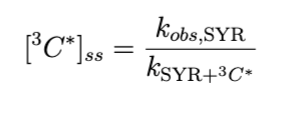

In [ ]:
ksyr=3.7*10**9 #model triplet from kaur 2019

SS1=kobs1SYR/ksyr
print('Triplet steady state concentration 1:', SS1) 

SS2=kobs2SYR/ksyr
print('Triplet steady state concentration 2:', SS2) 

SS3=kobs3SYR/ksyr
print('Triplet steady state concentration 3:', SS3) 

tripletmeanSS=np.mean([SS1,SS2,SS3])
stdSS=np.std([SS1,SS2,SS3],ddof=1)

print('mean SS',tripletmeanSS)
print('STD SS',stdSS)


# Quantum Yield

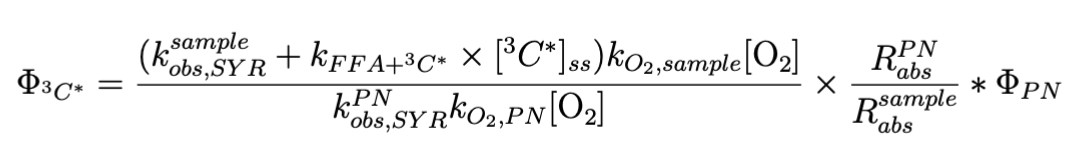

In [ ]:
Phi_PN=1 #from Schweitzer and Schmidt 
ko2PN=1.9*10**9
ko2sens=2.8*10**9
kFFA_3C= 2.35*10**9 # M^-1 s^-1 from Minella 2018 

Phi_3C_samp1 = ((kobs1SYR+ SS1*kFFA_3C) / kobsPNSYR) * (ko2sens / ko2PN) * (R_abs_PN / R_abs_samp1) * Phi_PN
print('Quantum Yield Sample 1:', Phi_3C_samp1*100)

Phi_3C_samp2 = ((kobs2SYR+ SS1*kFFA_3C) / kobsPNSYR) * (ko2sens / ko2PN) * (R_abs_PN / R_abs_samp2) * Phi_PN
print('Quantum Yield Sample 2:', Phi_3C_samp2*100)

Phi_3C_samp3 = ((kobs3SYR+ SS1*kFFA_3C) / kobsPNSYR) * (ko2sens / ko2PN) * (R_abs_PN / R_abs_samp3) * Phi_PN
print('Quantum Yield Sample 3:', Phi_3C_samp3*100)


In [ ]:
finalyield=np.mean([Phi_3C_samp1,Phi_3C_samp2,Phi_3C_samp3])
finalSD=np.std([Phi_3C_samp1,Phi_3C_samp2,Phi_3C_samp3],ddof=1)
print('Avg Quantum yield',finalyield*100)
print('SD Quantum yield',finalSD*100)

# Final Quantum Yield Calculation

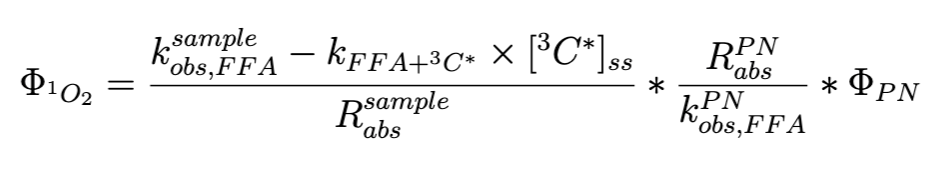

In [ ]:
Phi_PN=1 #from Schweitzer and Schmidt 
kFFA_3C= 2.35*10**9 # M^-1 s^-1 from Minella 2018 

Phi_1O2_samp1 = ((kobs1FFA - kFFA_3C*tripletmeanSS) / kobsPNFFA) * (R_abs_PN / R_abs_samp1) * Phi_PN
print('Quantum Yield Sample 1:', Phi_1O2_samp1*100)

Phi_1O2_samp2 = ((kobs2FFA - kFFA_3C*tripletmeanSS) / kobsPNFFA) * (R_abs_PN / R_abs_samp2) * Phi_PN
print('Quantum Yield Sample 2:', Phi_1O2_samp2*100)

Phi_1O2_samp3 = ((kobs3FFA - kFFA_3C*tripletmeanSS) / kobsPNFFA) * (R_abs_PN / R_abs_samp3) * Phi_PN
print('Quantum Yield Sample 3:', Phi_1O2_samp3*100)


In [ ]:
finalyield=np.mean([Phi_1O2_samp1,Phi_1O2_samp2,Phi_1O2_samp3])
finalSD=np.std([Phi_1O2_samp1,Phi_1O2_samp2,Phi_1O2_samp3],ddof=1)
print('Avg Quantum yield',finalyield*100)
print('SD Quantum yield',finalSD*100)

# Singlet Oxygen Steady State Concentration 

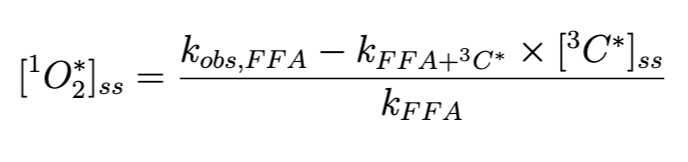

In [ ]:
Temp= #Put in your experimental temperature here, degrees C
kffa=10**8 + (2.1E6*(Temp-22)) #from Appaini (2017)

SS1=(kobs1FFA - kFFA_3C*tripletmeanSS)/kffa
print('Singlet Oxygen steady state concentration 1:', SS1) 

SS2=(kobs2FFA - kFFA_3C*tripletmeanSS)/kffa
print('Singlet Oxygen steady state concentration 2:', SS2) 

SS3=(kobs3FFA - kFFA_3C*tripletmeanSS)/kffa
print('Singlet Oxygen steady state concentration 3:', SS3)

meanSS=np.mean([SS1,SS2,SS3])
stdSS=np.std([SS1,SS2,SS3],ddof=1)

print('mean SS',meanSS)
print('STD SS',stdSS)
